# Подготовим наши данные к импортированию

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import matplotlib.colors as mcolors

In [6]:
%matplotlib inline

In [7]:
df=pd.read_csv('athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
df.shape

(271116, 15)

In [9]:
df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

## Заполним пропуски в данных, кроме медалей

In [10]:
for i in set(df.columns[:-1]):
    if df[i].isna().sum()!=0:
        df[i].fillna(round(np.mean(df[i])),inplace=True)
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,71.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.0,71.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


## Начнем наш анализ

Олимпийские игры довольно сложные события, так как для каждой игры нужно подобрать локацию, страну с развитой экономикой, чтобы гости принимающей страны могли себя чувствовать комфортно, чтобы для них были подготовлены все снаряды, оборудование и т.д. Данные, которые представлены выше явно имеют некоторую маленькую погрешность, так как пустые ячейки по росту, весу и возрасту были заполнены средним, однако это не сильно влияет на анализ, так как в данных много категориальных признаков, которые подразумевают другой вид анализа. Итак, начнем наш анализ: 

##### Для начала рассмотрим наши вещественные данные, а именно количество стран-участников в каждых Олимпийских играх. 

Text(0.5, 1.0, 'Количество стран, участвующих в Олимпийских играх за период 1896-2016')

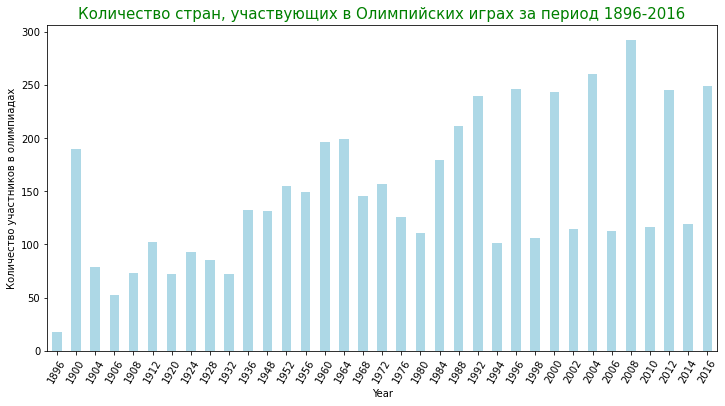

In [11]:
#В каком году было больше всего команд-участников?
plt.figure(figsize=(12,6))
df.groupby('Year')['Team'].nunique().plot(kind='bar',color='lightblue')
plt.xticks(rotation=60)
plt.ylabel("Количество участников в олимпиадах")
plt.title("Количество стран, участвующих в Олимпийских играх за период 1896-2016",fontsize=15,color='green')

In [12]:
# Сколько было стран участников в 2008 году?
max_teams=df.groupby('Year')['Team'].nunique().max()
print('Максимальное количество стран:', max_teams)

Максимальное количество стран: 292


In [13]:
### Посмотрим, где проводились игры с самым большим количеством стран-участников
country=list(set(df[df.Year==2008]['City']))
print('Максимальное количество стран-участников было на играх в',country[0] )

Максимальное количество стран-участников было на играх в Beijing


Вывод: по нашем графику видим, что в 2008 году были самые грандиозные олимпийские игры с самым большим количеством стран-участников. Эти игры проводились в  Пекине и насчитывали 292 стран-участников. Один Пекин насчитывает почти 18 миллионов жителей. Игры начались с ошеломительной церемонии открытия на Национальном стадионе, называемом также "Птичье гнездо"; 90 000 зрителей на стадионе и несколько сотен миллионов по телевидению наслаждались этим зрелищем.

#### Посмотрим,сколько медалей было получено по каждому виду спорта за данный период

In [14]:
prizeri=df[['Team','Medal','Year','Sport']].drop_duplicates().dropna()
prizeri

,Team,Medal,Year,Sport
3,Denmark/Sweden,Gold,1900,Tug-Of-War
37,Finland,Bronze,1920,Swimming
40,Finland,Bronze,2014,Ice Hockey
41,Finland,Bronze,1948,Gymnastics
42,Finland,Gold,1948,Gymnastics
...,...,...,...,...
270896,Germany,Gold,1908,Diving
270914,Switzerland,Silver,1896,Gymnastics
270917,Switzerland,Gold,1896,Gymnastics
270981,Georgia,Gold,2004,Judo


In [15]:
sport=pd.DataFrame(prizeri.groupby('Sport')['Medal'].count())
sport

,Medal
Sport,
Aeronautics,1
Alpine Skiing,253
Alpinism,6
Archery,124
Art Competitions,105
...,...
Tug-Of-War,16
Volleyball,77
Water Polo,96


In [16]:
medals=sport['Medal'].tolist()
sport_l=sorted(list(set(prizeri['Sport'])))

Text(0.5, 1.0, 'Количество медалей по каждому виду спорта')

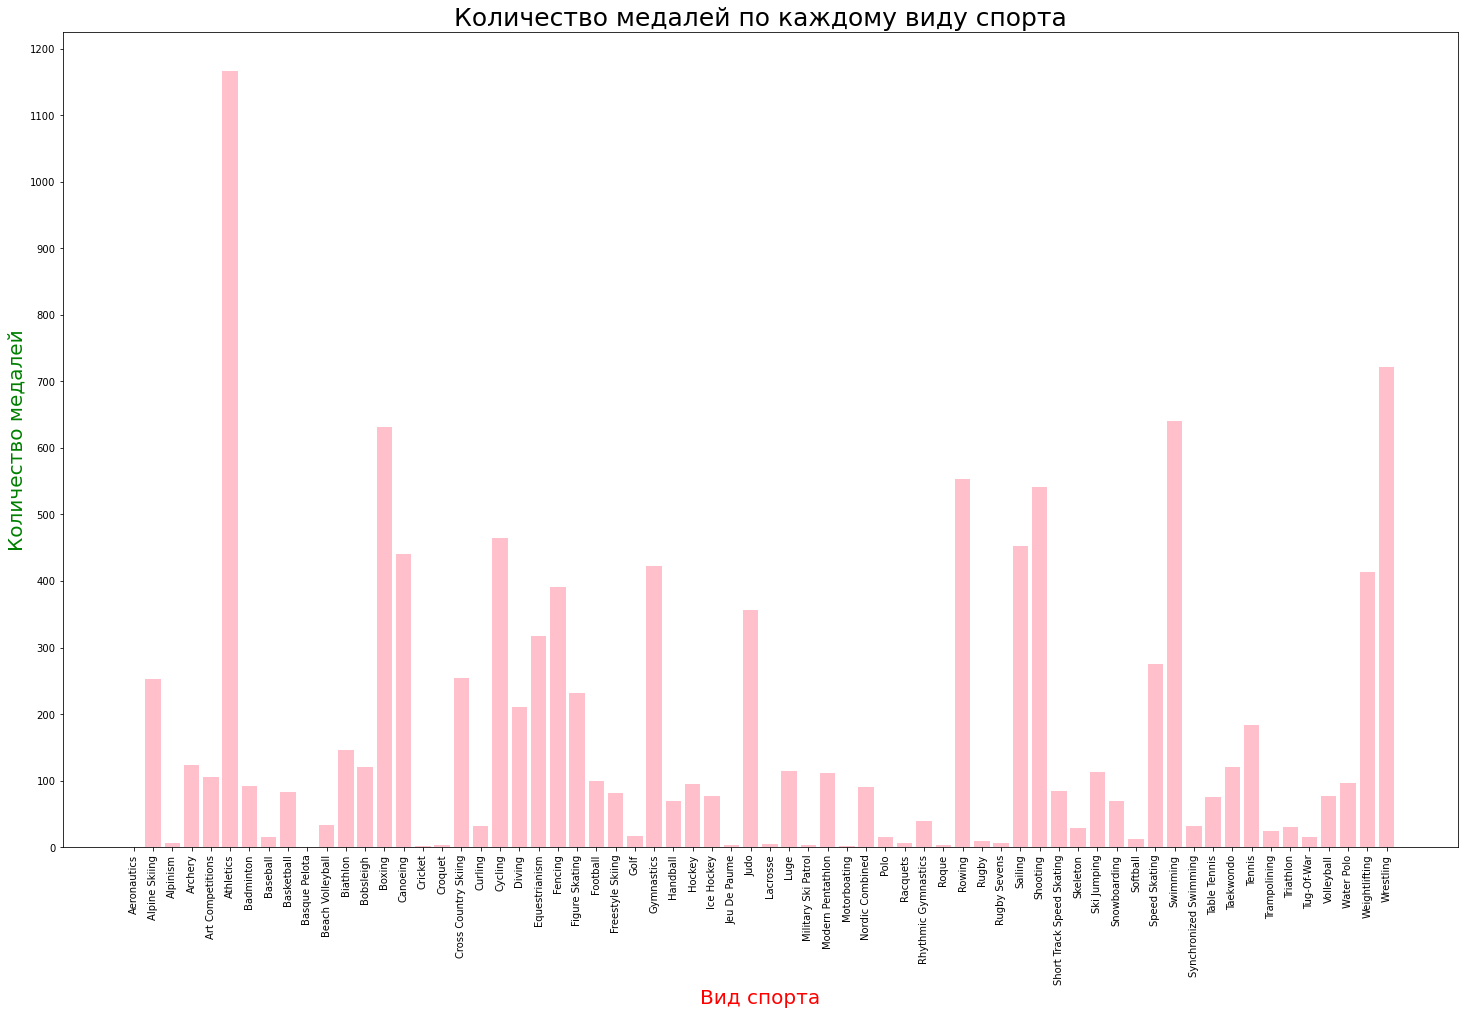

In [34]:
plt.figure(figsize=(25,15))
plt.xticks(rotation=90)
plt.yticks(np.arange(0,1250,100))
plt.bar(sport_l,medals,color='pink')

plt.xlabel('Вид спорта',fontsize=20,color='red')
plt.ylabel('Количество медалей',fontsize=20,color='green')
plt.title('Количество медалей по каждому виду спорта',fontsize=25,color='black')


Вывод: самым "медальным" видом спорта является легкая атлетика, такой вывод довольно очевиден, так как в легкую атлетику входит 6 разных видов спорта: беговые виды, спортивную ходьбу, технические виды (прыжки и метания), многоборья, пробеги (бег по шоссе) и кроссы (бег по пересечённой местности). 

## Посмотрим на соотношение участников по половому признаку на зимних и летних играх (количество мужчин/женщин в процентном соотношении)

In [18]:
sum_games=df[df.Season=='Summer']
wint_games=df[df.Season=='Winter']

In [19]:
sum_games['Sex'].value_counts()

M    163109
F     59443
Name: Sex, dtype: int64

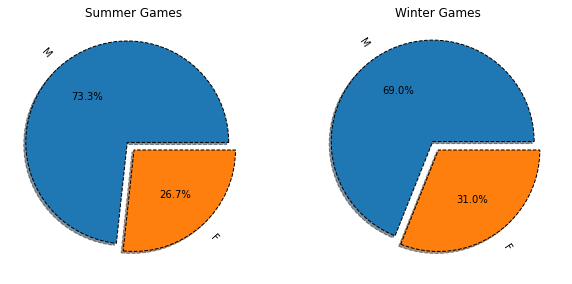

In [152]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))


ax[0].pie(sum_games['Sex'].value_counts(),labels=sorted(list(set(sum_games['Sex'])),reverse=True), 
          autopct='%1.1f%%', explode=(0.1, 0),shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax[1].pie(wint_games['Sex'].value_counts(),labels=sorted(list(set(sum_games['Sex'])),reverse=True),
          autopct='%1.1f%%', explode=(0.1, 0), shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)

ax[0].set(title='Summer Games')
ax[1].set(title='Winter Games')

    
plt.show()

Заметим, что количество мужчин в данной выборке участников олимпийских игр намного больше, нежели девушек. Это связано с видами спорта, так как, например, на летних олимпийских играх команд по футболу мужских намного больше нежели женских.

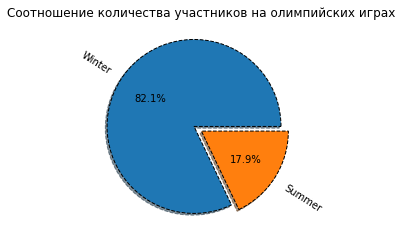

In [30]:
#Рассмотрим так же количество участников на разных олимпиадах
fig, ax = plt.subplots()


ax.pie(df.groupby('Season').size(),labels=set(df['Season']), 
          autopct='%1.1f%%', explode=(0.1, 0),shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)

ax.set(title='Соотношение количества участников на олимпийских играх')

    
plt.show()

In [31]:
df.groupby('Season').size()

Season
Summer    222552
Winter     48564
dtype: int64

Вывод: Мы видим, что зимние олимпийские игры намного популярнее, чем летние. Процент участников зимних игр превосходит процент участников летних игр на 64.2 процентных пункта 

### Рассмотрим количество участников (не стран-участников) на олимпийских играх и 5 популярных вида спорта и их участников

Text(0.5, 1.0, 'Количество участников по 5 популярным видам спорта')

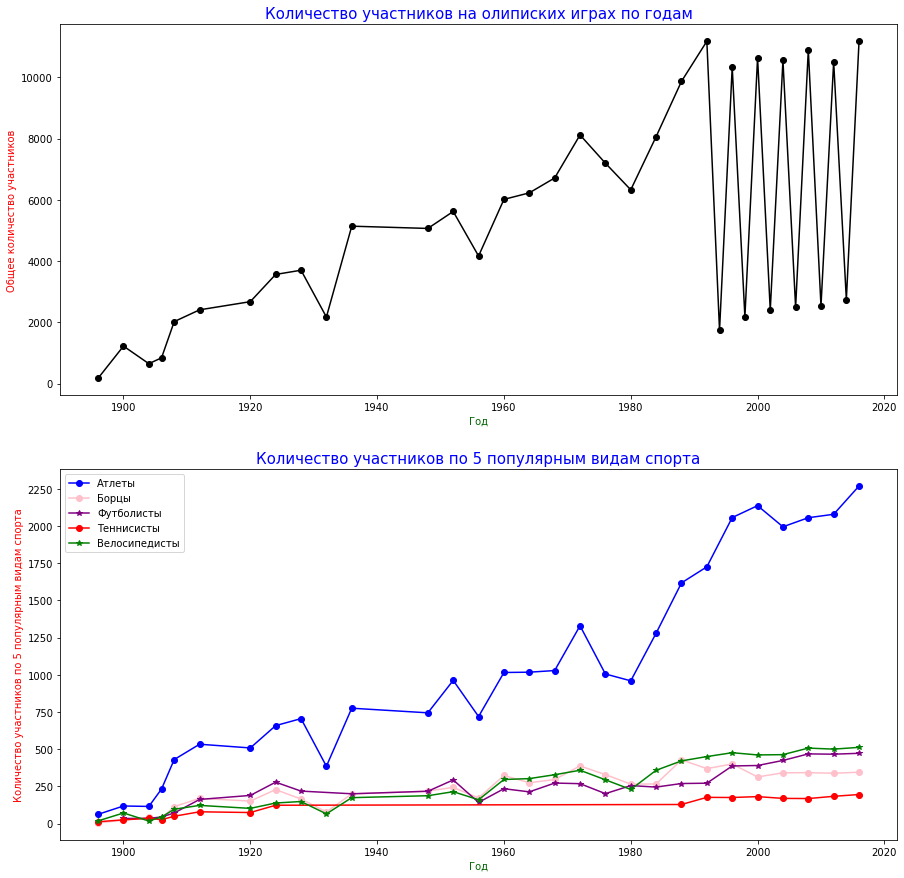

In [66]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1) #row , column,plot
df.groupby('Year')['ID'].nunique().plot(color='k',marker='o')
plt.ylabel("Общее количество участников",color='red')
plt.xlabel('Год',color='darkgreen')
plt.title("Количество участников на олиписких играх по годам",fontsize=15,color='blue')
plt.subplot(2,1,2)

#Рассмотрим для примера количество участников по двум самым популярным видам спорта
df.loc[df['Sport']=='Athletics'].groupby('Year')['ID'].nunique().plot(color='blue',marker='o',label='Атлеты')
df.loc[df['Sport']=='Wrestling'].groupby('Year')['ID'].nunique().plot(color='pink',marker='o',label='Борцы')
df.loc[df['Sport']=='Football'].groupby('Year')['ID'].nunique().plot(color='purple',marker='*',label='Футболисты')
df.loc[df['Sport']=='Tennis'].groupby('Year')['ID'].nunique().plot(color='red',marker='o',label='Теннисисты')
df.loc[df['Sport']=='Cycling'].groupby('Year')['ID'].nunique().plot(color='green',marker='*',label='Велосипедисты')

plt.yticks(np.arange(0,2500,250))
plt.ylabel("Количество участников по 5 популярным видам спорта",color='red')
plt.xlabel('Год',color='darkgreen')
plt.legend(loc='upper left')
plt.title("Количество участников по 5 популярным видам спорта",fontsize=15,color='blue')

Вывод: Среди популярных видов спорта наибольшее количество участников числятся в легкой атлетике. Удивительный факт, что велосипедистов намного больше участвовало на олимпийских играх нежели футболистов, в команде которых по 11 человек в каждой. Видим, что на протяжении всего рассмотренного периода наблюдается возрастающая тенденция к участию в играх. Данный факт подвверждается ростом количества участников. Конечно, это связано с ростом и развитием стран, однако не стоит забывать, что не каждый может заполучить квоту на играх.

### Расмотрим плотность распределения возраста, веса и роста участников

Age skewness is : 1.77
Height skewness is : 0.05
Weight skewness is : 0.89


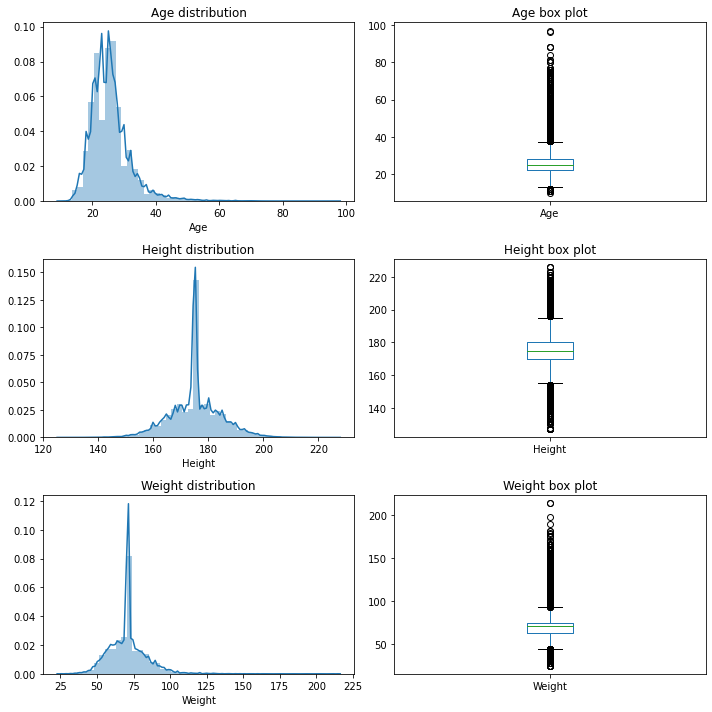

In [156]:
treat = ['Age','Height','Weight']
x = 1
plt.figure(figsize=(10,10))
for col in treat:
    plt.subplot(3,2,x)
    plt.title(col+' distribution')
    sns.distplot(df[col])
    
    plt.subplot(3,2,x+1)
    plt.title(col+' box plot')
    df[col].plot.box()
    print('{} skewness is : {}'.format(col, round(df[col].skew(),2)))
    x = x + 2
    
plt.tight_layout()
plt.show()

По распределению веса, роста и возраста можно заметить, что в основном участники были в возрасте от 20 до 25 лет, их рост в среднем колеблется от 170-180 см, а вес в среднем не превышает 75 кг. Конечно, мы видим участников и с большим и меньшим весом, однако это больше исключения, нежели закономерность, так как есть такие виды спорта, как борьба, бокс, чья специализация изначально подразумевает разные весовые категории.

### Также рассмотрим, 30 наиболее частых участников стран на Олимпийских играх за рассмотренный период 

Text(0.5, 1.0, 'Количество участия стран')

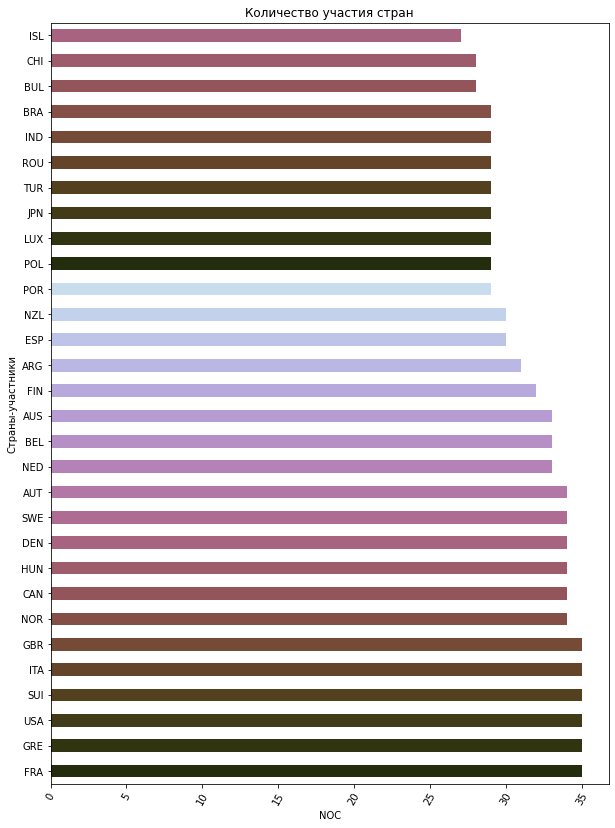

In [65]:
participation = df.groupby('NOC').nunique()[['Year','NOC']].sort_values('Year',ascending=False).head(30)
participation.plot(y='Year',kind='barh',legend=None,figsize=(10,14),color=sns.cubehelix_palette(20,start=5,rot=-.90,reverse=True))
plt.xticks(rotation=60)
plt.xlabel('NOC')
plt.ylabel('Страны-участники')
plt.title('Количество участия стран')

Вывод: Заметим, что самые частые участники олимпийских игр это Великобритания, Италия, США, Германия, Франция и Швейцария. За рассмотренный период эти страны поучаствовали наибольшее количество раз в олимпийских играх, а именно по 35 раз каждая.

### Давайте рассмотрим, сколько раз страны принимали олимпийские игры у себя на территории

In [68]:
countries = {'Athina':'Greece',
                'Paris':'France',
                'St. Louis':'USA',
                'London':'UK',
                'Stockholm':"Sweden",
                'Antwerpen':'Belgium',
                'Amsterdam':'Netherlands',
                'Los Angeles':'USA',
               'Berlin':'Germany',
                'Helsinki':'Finland',
                'Melbourne':'Australia',
                'Roma':'Italy',
                'Tokyo':'Japan',
                'Mexico City':'Mexico',
                'Munich':'Germany',
                'Montreal':'Canada',
                'Moskva':'Russia',
                'Seoul':'South Korea',
               'Barcelona':'Spain',
               'Atlanta':'USA',
               'Sydney':'Australia',
               'Beijing':'China',
               'Rio de Janeiro':'Brazil'}


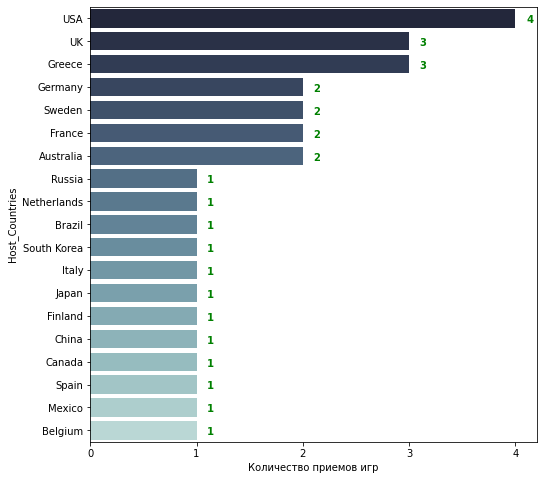

In [85]:
df['Host_Countries']=df['City'].map(countries)
amount=host['Host_Countries'].value_counts().values
plt.figure(figsize=(8,8))
plt.xticks(np.arange(0,5))
host = df[['Year','Host_Countries']].drop_duplicates()
sns.countplot(y='Host_Countries',data=host,order = host['Host_Countries'].value_counts().index,
              palette=sns.cubehelix_palette(20,start=3,rot=-.25,reverse=True))
plt.xlabel('Количество приемов игр')
for i, v in enumerate(amount):
    plt.text(v+0.1,i+0.2, str(v), color='green', fontweight='bold')

Вывод: США принимали наибольшее количество раз Олимпийские игры у себя дома. Немного меньше Великобритания и Греция, которые размещали игры на своей территории 3 раза

### Посмотрим, какие страны получали наибольшее количество медалей (выделим топ-10)

In [137]:
medals2=pd.DataFrame(prizeri.groupby('Team')['Medal'].agg(np.count_nonzero))
medals2=medals2.sort_values('Medal',ascending=False).head(10)
medals2

,Medal
Team,
United States,894
Germany,539
France,534
Great Britain,481
Italy,475
Soviet Union,428
Sweden,403
Hungary,337
Canada,323


Text(0.5, 0, 'Страна')

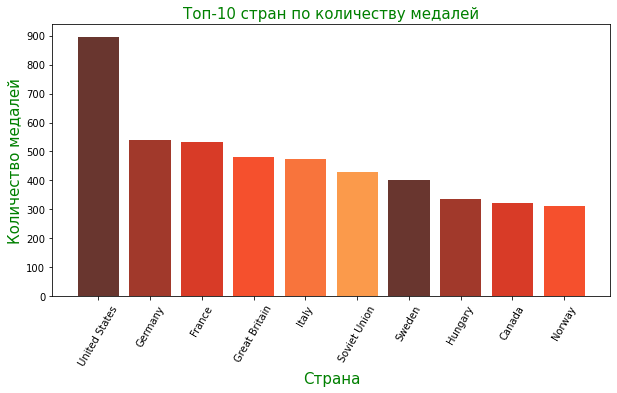

In [144]:
x=['United States','Germany','France','Great Britain','Italy','Soviet Union','Sweden','Hungary','Canada','Norway']
plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
plt.bar(x,medals2['Medal'].tolist(),color=sns.color_palette("YlOrRd_d"))
plt.title('Топ-10 стран по количеству медалей',color='green',fontsize=15)
plt.yticks(np.arange(0,1000,100))
plt.ylabel('Количество медалей',color='green',fontsize=15)
plt.xlabel('Страна',color='green',fontsize=15)

Вывод:Наибольшее количество медалей за расмотренные олимпийские игры получили США

### Выведем карту и посмотрим на ней, где проходили олимпийские игры

In [166]:
set(df.City)

{'Albertville',
 'Amsterdam',
 'Antwerpen',
 'Athina',
 'Atlanta',
 'Barcelona',
 'Beijing',
 'Berlin',
 'Calgary',
 'Chamonix',
 "Cortina d'Ampezzo",
 'Garmisch-Partenkirchen',
 'Grenoble',
 'Helsinki',
 'Innsbruck',
 'Lake Placid',
 'Lillehammer',
 'London',
 'Los Angeles',
 'Melbourne',
 'Mexico City',
 'Montreal',
 'Moskva',
 'Munich',
 'Nagano',
 'Oslo',
 'Paris',
 'Rio de Janeiro',
 'Roma',
 'Salt Lake City',
 'Sankt Moritz',
 'Sapporo',
 'Sarajevo',
 'Seoul',
 'Sochi',
 'Squaw Valley',
 'St. Louis',
 'Stockholm',
 'Sydney',
 'Tokyo',
 'Torino',
 'Vancouver'}

In [2]:
m=folium.Map(zoom_start=20)
folium.Marker(location=[45.6745200,6.3906100], popup = "Альбервиль", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[39.9075000,116.3972300], popup = "Амстердам", icon=folium.Icon(color = 'red')).add_to(m)
folium.Marker(location=[51.2198900, 4.4034600], popup = "Антверпен", icon=folium.Icon(color = 'blue')).add_to(m)
folium.Marker(location=[37.9794500,23.7162200], popup = "Афины", icon=folium.Icon(color = 'green')).add_to(m)
folium.Marker(location=[33.7490000,-84.3879800], popup = "Атланта", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[41.3887900,2.1589900], popup = "Барселона", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[39.9075000,116.3972300], popup = "Пекин", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[52.5243700,13.4105300], popup = "Берлин", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[51.0501100,-114.0852900], popup = "Калгари", icon=folium.Icon(color = 'red')).add_to(m)
folium.Marker(location=[45.9237500,  6.8693300], popup = "Шамони", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[46.5369000,12.1390300], popup = "Cortina d'Amprezzo", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[47.4920900, 11.0957600], popup = "Гармиш-Партенкихен", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[45.1666700,5.7166700], popup = "Гренобль", icon=folium.Icon(color = 'yellow')).add_to(m)
folium.Marker(location=[60.1695200,24.9354500], popup = "Хельсинки", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[47.2626600,11.3945400], popup = "Инсбрук", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[44.2796200,-73.9819800], popup = "Лейк Плэсид", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[61.1151400,10.4662800], popup = "Лильхамер", icon=folium.Icon(color = 'blue')).add_to(m)
folium.Marker(location=[39.9075000,116.3972300], popup = "Лондон", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[34.0522300,-118.2436800], popup = "Лос-Анджелес", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[-37.8140000,144.9633200], popup = "Мельбурн", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[19.4284700,-99.1276600], popup = "Мехико", icon=folium.Icon(color = 'green')).add_to(m)
folium.Marker(location=[45.5088400, -73.5878100], popup = "Монреаль", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[55.7522200,37.6155600], popup = "Москва", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[48.1374300,11.5754900], popup = "Мюнхен", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[36.6500000,138.1833300], popup = "Нагано", icon=folium.Icon(color = 'red')).add_to(m)
folium.Marker(location=[59.9127300,10.7460900], popup = "Осло", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[48.8534100,2.3488000], popup = "Париж", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[-22.9027800,-43.2075000], popup = "Рио-де-Жанейро", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[41.8919300,12.5113300], popup = "Рим", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[40.7607800,-111.8910500], popup = "Солт-лейк Сити", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[46.4984000,9.8390900], popup = "Sankt Moritz", icon=folium.Icon(color = 'red')).add_to(m)
folium.Marker(location=[43.0666700,141.3500000], popup = "Сапоре", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[43.8486400,18.3564400], popup = "Сараево", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[37.5660000,126.9784000], popup = "Сеул", icon=folium.Icon(color = 'purple')).add_to(m)
folium.Marker(location=[43.5991700,39.7256900], popup = "Сочи", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[38.9332400,-119.9843500], popup = "Squaw Valley", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[38.6272700,-90.1978900], popup = "Сент Льюис", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[59.3325800,18.0649000], popup = "Стокгольм", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[-33.8678500,151.2073200], popup = "Сидней", icon=folium.Icon(color = 'yellow')).add_to(m)
folium.Marker(location=[35.6895000,139.6917100], popup = "Токио", icon=folium.Icon(color = 'gray')).add_to(m)
folium.Marker(location=[45.0704900,7.6868200], popup = "Торино", icon=folium.Icon(color = 'purple')).add_to(m)
folium.Marker(location=[49.2496600,-123.1193400], popup = "Ванкувер", icon=folium.Icon(color = 'gray')).add_to(m)

<ipython-input-2-0f712b8ecbbb>:14: UserWarning: color argument of Icon should be one of: {'pink', 'beige', 'lightgray', 'darkblue', 'red', 'lightgreen', 'lightred', 'gray', 'darkgreen', 'purple', 'darkred', 'darkpurple', 'lightblue', 'green', 'white', 'orange', 'black', 'cadetblue', 'blue'}.
  folium.Marker(location=[45.1666700,5.7166700], popup = "Гренобль", icon=folium.Icon(color = 'yellow')).add_to(m)
<ipython-input-2-0f712b8ecbbb>:40: UserWarning: color argument of Icon should be one of: {'pink', 'beige', 'lightgray', 'darkblue', 'red', 'lightgreen', 'lightred', 'gray', 'darkgreen', 'purple', 'darkred', 'darkpurple', 'lightblue', 'green', 'white', 'orange', 'black', 'cadetblue', 'blue'}.
  folium.Marker(location=[-33.8678500,151.2073200], popup = "Сидней", icon=folium.Icon(color = 'yellow')).add_to(m)


__Запустить ячейку ниже, чтобы посмотреть интерактивную карту__

In [3]:
m

Вывод: География олимпийских игр довольно широкая.Латинская Америка, Австралия и Африка еще не встречали зимние игры, очевидно в силу невыгодного ЭГП материков. Стоит отметить, что летние олимпийские игры все же проходили на этих материках. Широта места проведения определяет климат территории. Наличие гор – благоприятное условие для построения открытых снежных трас для зимних видов спорта. В целом Олимпиада способствует экономическому развитию олимпийской столицы.